# Progetto del corso di Quantum Computing

## Caso base: immagine 4x4px

Iniziamo la trattazione con l'implementazione dell'algoritmo di base, nel caso di un'immagine $2^2 \times 2^2$ pixel.

### Import section

In [20]:
import numpy as np
from math import pi

# Grafici
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

L'immagine è volutamente dotata di repentini cambi verticali di intensità ogni 4 righe.

Height: 16, Width: 16


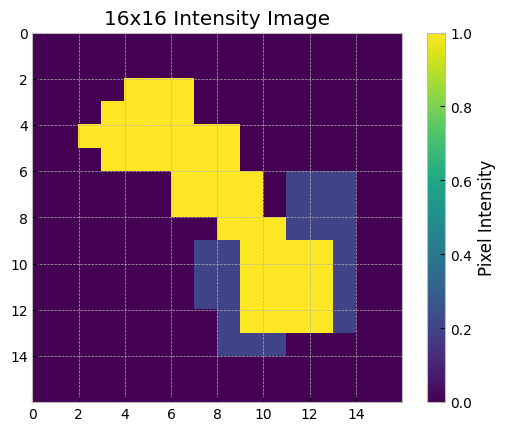

In [ ]:
# #A 16x16 image with marked rows
# image = np.array([
#     [(i % 4) * 0.25 for j in range(16)]
#     for i in range(16)
# ]) 

# A 8x8 binary image
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0.2, 0.2, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0.2, 0.2, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0.2, 0.2, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 1, 1, 1, 1, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 1, 1, 1, 1, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 1, 1, 1, 1, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0.2, 1, 1, 1, 1, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])



# Duplicare ogni elemento in un blocco 2x2 per ottenere un'immagine 16x16
# image = np.kron(image, np.ones((2, 2)))
height, width = image.shape
print(f"Height: {height}, Width: {width}")


# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(0, img.shape[0], 2))  # Show ticks every 2 pixels for clarity
    plt.yticks(range(0, img.shape[1], 2))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.colorbar(label="Pixel Intensity")
    plt.show()
    
plot_image(image, '16x16 Intensity Image')

Utilizziamo ora la _Quantum Probability Image Encoding_ (QPIE) per codificare le intensità dei pixel:

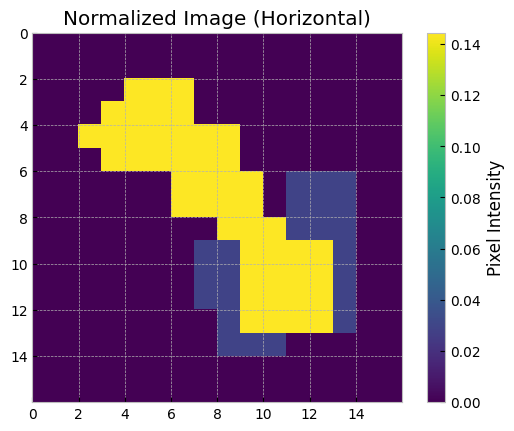

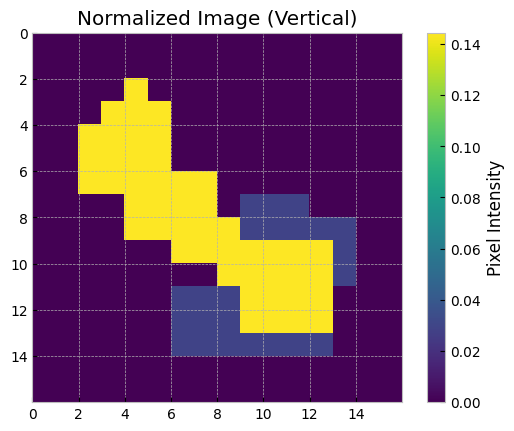

In [22]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)

plot_image(image_norm_h.reshape(height, width), 'Normalized Image (Horizontal)')
plot_image(image_norm_v.reshape(height, width), 'Normalized Image (Vertical)')

In [23]:
# Initialize some global variable for number of qubits
data_qb = 8
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
print(D2n_1)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


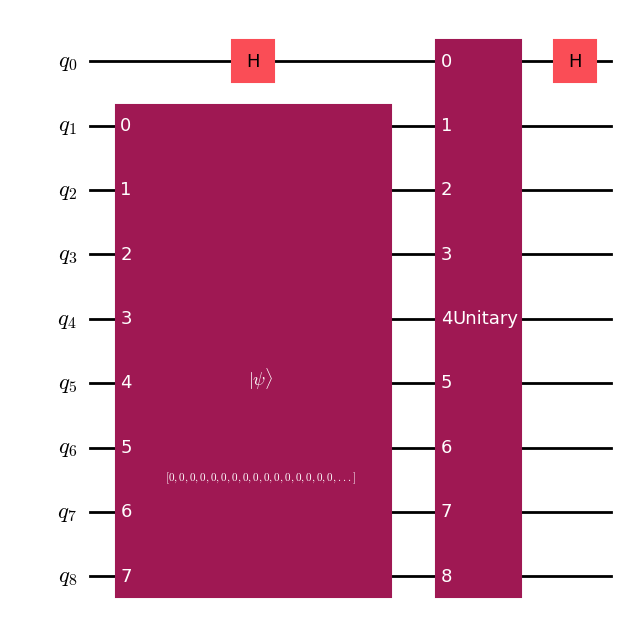

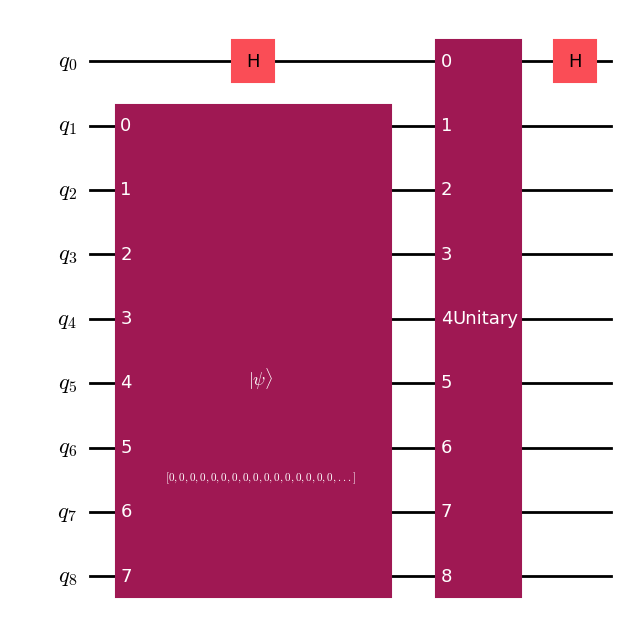

In [24]:
from qiskit import *
from qiskit import transpile
from qiskit_aer import Aer


# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
display(qc_v.draw('mpl', fold=-1))

# Combine both circuits into a single list
circ_list = [qc_h, qc_v]

In [25]:
# Simulating the circuits
backend = Aer.get_backend('statevector_simulator')
new_circuit = transpile(circ_list, backend)

# Stampa dei circuiti dopo il transpile
# for idx, circuit in enumerate(new_circuit):
#     print(f"Circuito {idx + 1} dopo il transpiling:")
#     print(circuit.draw())

result = backend.run(new_circuit).result()
sv_h = np.array(result.get_statevector(qc_h))
sv_v = np.array(result.get_statevector(qc_v))

from qiskit.visualization import array_to_latex
print('Horizontal scan statevector:')
print(sv_h[:64])
#display(array_to_latex(sv_h[:30], max_size=30))
print()
print('Vertical scan statevector:')
print(sv_v[:64])
#display(array_to_latex(sv_v[:30], max_size=30))

Horizontal scan statevector:
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

Vertical scan statevector:
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


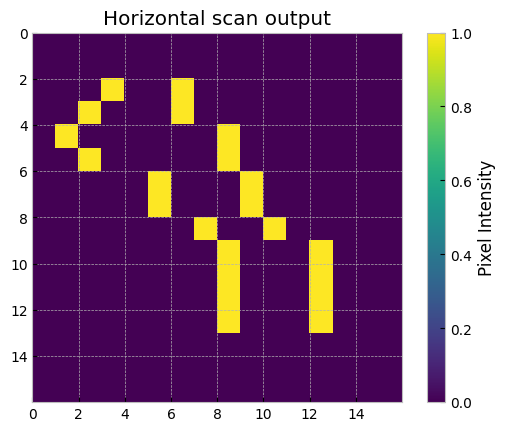

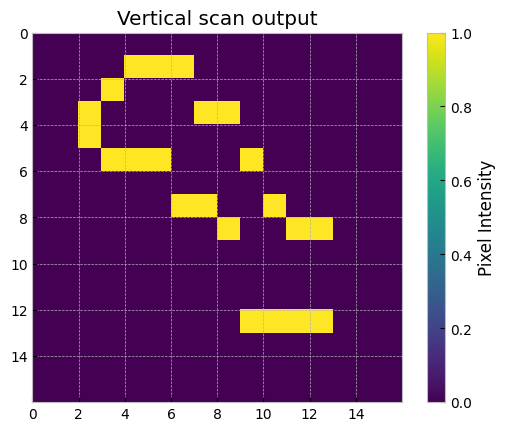

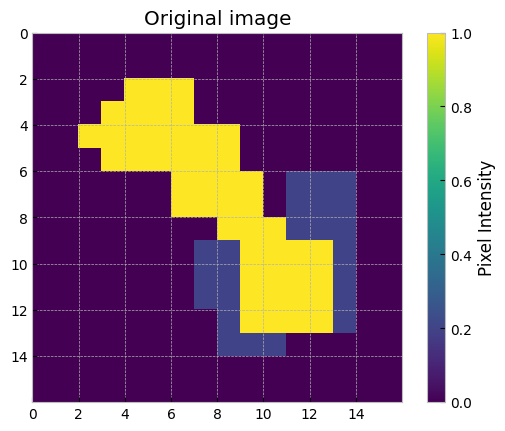

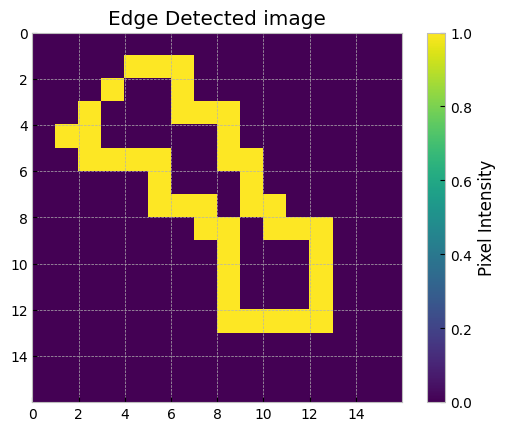

In [26]:
# Classical postprocessing for plotting the output

# Defining a lambda function for
# thresholding to binary values
bound=4e-02
threshold = lambda amp: (amp > bound or amp < -bound)

# Selecting odd states from the raw statevector and
# reshaping column vector of size 64 to an 8x8 matrix
edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(height, width)
edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(height, width).T

print(edge_scan_v)

# Plotting the Horizontal and vertical scans
plot_image(edge_scan_h, 'Horizontal scan output')
plot_image(edge_scan_v, 'Vertical scan output')

# Combining the horizontal and vertical component of the result
edge_scan_sim = edge_scan_h | edge_scan_v

# Plotting the original and edge-detected images
plot_image(image, 'Original image')
plot_image(edge_scan_sim, 'Edge Detected image')

## Error handling

Per iniziare, prendiamo un modello di rumore da un chip fisico (`ibm_kyiv`).

In [27]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="cd9627c6de96e42618ed7038236b7d2bcff428e501b8f6866512731ad43cb60c57f5aff2822718b0e9b71c3d9bc58cda7d21994fe6ec88bbaf5ac128ce2715b3")
print(service.backends())

backend = service.backend("ibm_kyiv")
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map
# Get basis gates from noise model
basis_gates = noise_model.basis_gates

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


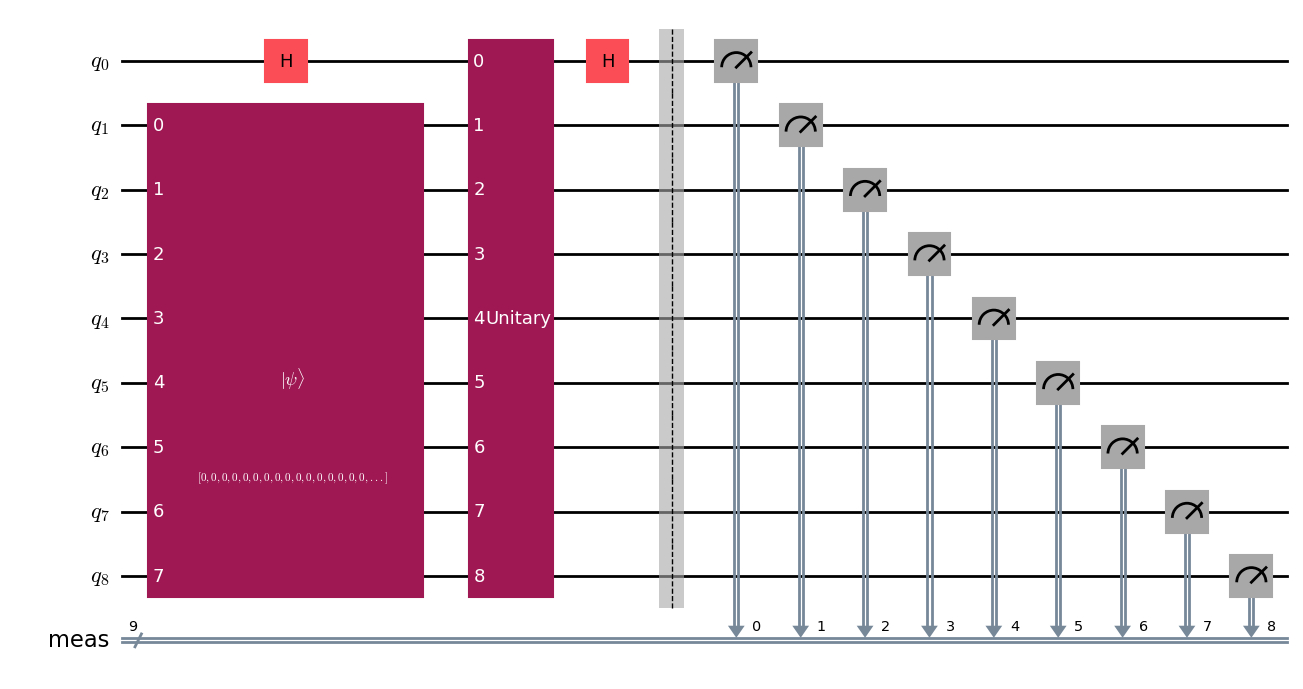

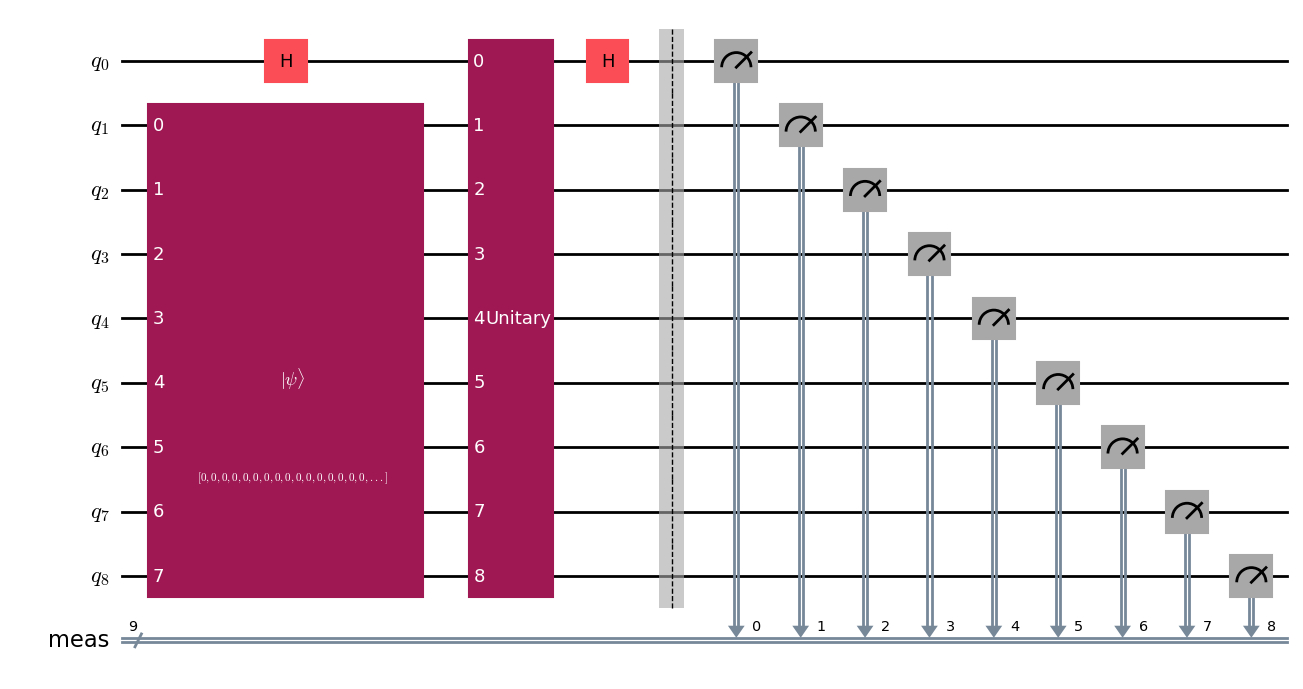

Result(backend_name='aer_simulator', backend_version='0.16.0', qobj_id='', job_id='b31465f1-c44d-4af5-97b8-e777028ff037', success=True, results=[ExperimentResult(shots=65536, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1bf': 1, '0x17': 2, '0x3d': 2, '0x3b': 1, '0x9f': 1, '0xe1': 7, '0xbd': 2, '0x1fb': 3, '0x1df': 1, '0x103': 5, '0x16b': 2, '0x16f': 4, '0x1e9': 3, '0x101': 1, '0x1ef': 2, '0x167': 8, '0x1d': 3, '0x1a1': 5, '0x95': 13, '0x1bd': 1, '0x1f5': 5, '0x109': 3, '0xbf': 3, '0x143': 2, '0xbb': 5, '0x35': 3, '0x129': 8, '0x31': 35, '0x145': 5, '0x55': 8, '0x11f': 12, '0x107': 17, '0x105': 9, '0x10c': 14, '0x1a4': 24, '0x10d': 4, '0x17d': 7, '0x7b': 3, '0x1bb': 1, '0x1ed': 6, '0x5b': 11, '0x13': 6, '0xc1': 3, '0xef': 43, '0xb': 4, '0x5d': 9, '0x1c8': 16, '0x37': 8, '0x123': 3, '0x1a3': 3, '0x12c': 21, '0x1bc': 13, '0x10a': 20, '0x1f9': 18, '0x1cd': 8, '0xa1': 19, '0x9d': 4, '0xc0': 60, '0x1e0': 4, '0x18b': 8, '0x1c6': 24, '0x1ad': 6, '0x53': 13, '0x33': 6, '0xc5

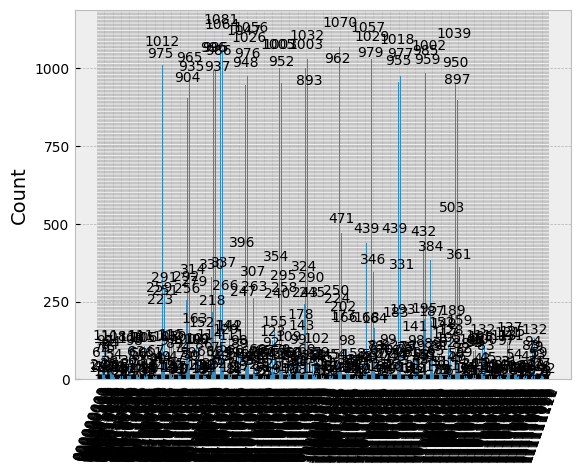



Counts for Vertical scan:


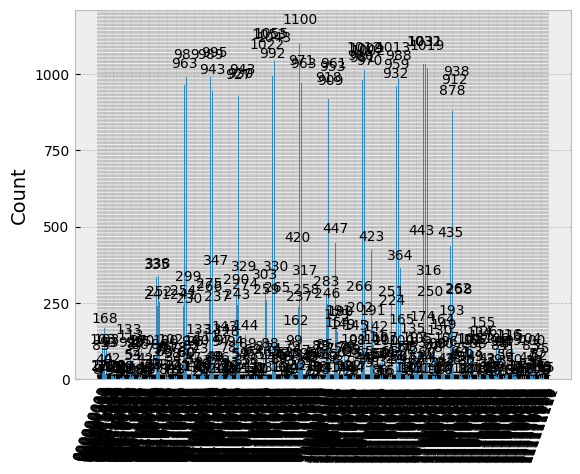

In [28]:
# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
qc_h.measure_all()
display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
qc_v.measure_all()
display(qc_v.draw('mpl', fold=-1))

# # Transpile the circuits for optimized execution on the backend
# qc_h_t = transpile(qc_h, backend=backend, optimization_level=3)
# qc_h_v = transpile(qc_v, backend=backend, optimization_level=3)
# print('transpiled!')

# Combine both circuits into a single list
# circ_list = [qc_h_t, qc_h_v]
circ_list = [qc_h, qc_v]

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)

from qiskit.visualization import plot_histogram
result = backend.run(circ_list, shots=2**16).result()
print(result)

counts_h = result.get_counts(qc_h)
counts_v = result.get_counts(qc_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

{'000000000': 13,
 '000000001': 1,
 '000000010': 24,
 '000000011': 20,
 '000000100': 61,
 '000000101': 4,
 '000000110': 75,
 '000000111': 18,
 '000001000': 97,
 '000001001': 4,
 '000001010': 111,
 '000001011': 4,
 '000001100': 75,
 '000001101': 26,
 '000001110': 84,
 '000001111': 33,
 '000010000': 94,
 '000010001': 21,
 '000010010': 108,
 '000010011': 6,
 '000010100': 54,
 '000010101': 18,
 '000010110': 24,
 '000010111': 2,
 '000011000': 15,
 '000011001': 4,
 '000011010': 15,
 '000011011': 1,
 '000011100': 9,
 '000011101': 3,
 '000011110': 7,
 '000011111': 1,
 '000100000': 7,
 '000100001': 3,
 '000100010': 11,
 '000100100': 36,
 '000100101': 27,
 '000100110': 103,
 '000100111': 3,
 '000101000': 110,
 '000101001': 4,
 '000101010': 98,
 '000101011': 4,
 '000101100': 63,
 '000101101': 19,
 '000101110': 60,
 '000101111': 7,
 '000110000': 56,
 '000110001': 35,
 '000110010': 111,
 '000110011': 6,
 '000110100': 105,
 '000110101': 3,
 '000110110': 106,
 '000110111': 8,
 '000111000': 35,
 '0001

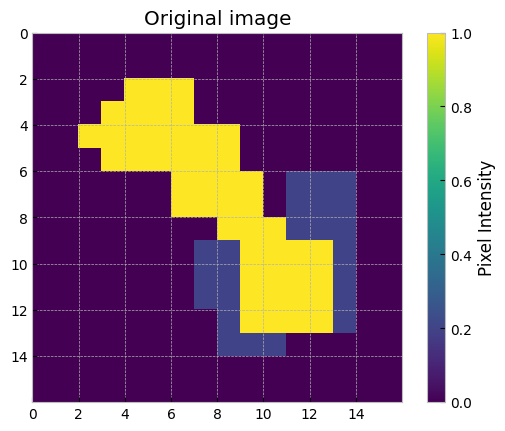

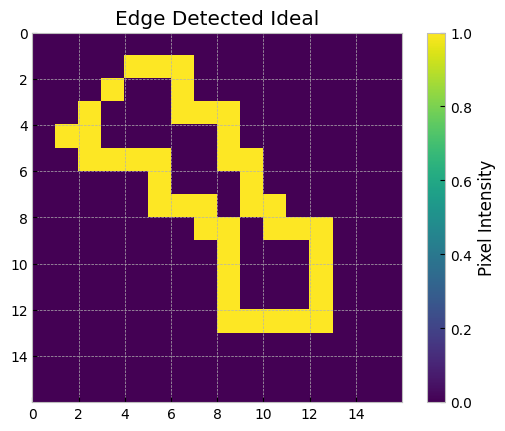

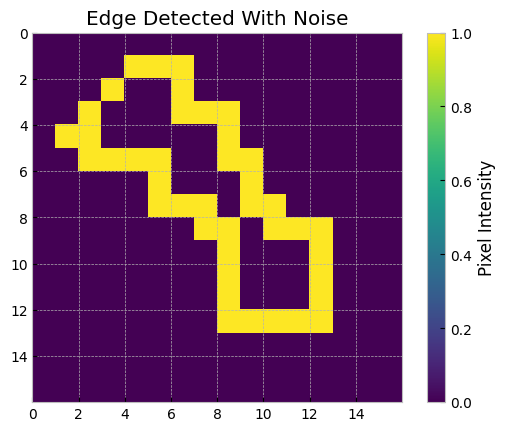

In [29]:
from pprint import pprint

# Extracting counts for odd-numbered states
pprint(counts_h, sort_dicts=True)

# edge_scan_h = np.array([counts_h.get(f'{2*i+1:09b}', 0) for i in range(2**data_qb)]).reshape(height,width)
# edge_scan_v = np.array([counts_v.get(f'{2*i+1:09b}', 0) for i in range(2**data_qb)]).reshape(height,width).T

edge_scan_h = np.array([
    1 if counts_h.get(f'{2*i+1:09b}', 0) > 75 else 0
    for i in range(2**data_qb)
]).reshape(height, width)

edge_scan_v = np.array([
    1 if counts_v.get(f'{2*i+1:09b}', 0) > 75 else 0
    for i in range(2**data_qb)
]).reshape(height, width).T

edge_detected_image = edge_scan_h | edge_scan_v

# Plotting the original and edge-detected images
plot_image(image, 'Original image')
plot_image(edge_scan_sim, 'Edge Detected Ideal')
plot_image(edge_detected_image, 'Edge Detected With Noise')